In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.DataFrame(np.random.randint(1,10,32).reshape(8,4), columns=['a','b','c','d'])

In [3]:
df

,a,b,c,d
0,3,2,8,9
1,3,8,7,3
2,2,6,1,6
3,2,1,9,4
4,4,7,2,6
5,8,9,2,7
6,5,8,3,8
7,8,4,4,9


In [4]:
x = df.a.value_counts()

In [5]:
y = df.b.value_counts()

([array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
  array([6., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 2 Lists of Patches objects>)

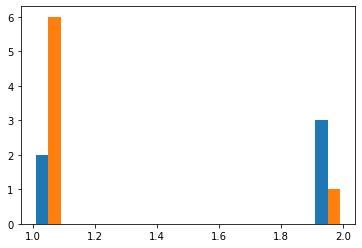

In [6]:
plt.hist([x,y])

In [7]:
hist,bins = np.histogram(x)

In [8]:
hist

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int64)

In [9]:
bins

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

### Chapter 3

In [10]:
# Try doing what the book's PMF function does with pandas

vals = pd.Series([1,2,2,3,5])
vals

0    1
1    2
2    2
3    3
4    5
dtype: int64

In [11]:
pmf = vals.value_counts(normalize=True,).sort_index()
pmf

1    0.2
2    0.4
3    0.2
5    0.2
dtype: float64

In [12]:
pmf[2]

0.4

### Trying out some scipy.stats and numpy stuff for pmf

In [13]:
import scipy.stats as stats

In [14]:
a = np.random.randint(1, 5, size=20)
a

array([2, 4, 2, 2, 3, 3, 2, 1, 3, 1, 1, 2, 2, 4, 3, 1, 1, 3, 3, 2])

In [15]:
val, cnt = np.unique(a, return_counts=True)

In [16]:
rv = stats.rv_discrete(values=(val, cnt/len(a)))

In [17]:
rv

In [18]:
rv.pk

array([0.25, 0.35, 0.3 , 0.1 ])

In [19]:
rv.xk

array([1, 2, 3, 4])

In [20]:
rv.pmf(1)

0.25

In [21]:
rv.pmf(5)

0.0

In [22]:
rv.pmf(2)

0.35

In [23]:
rv.cdf(2)

0.6

In [24]:
rv.mean(), rv.std(), rv.var()

(2.25, 0.9420721840708383, 0.8874999999999993)

In [25]:
# Try creating the rv from the pandas Series
rv2 = stats.rv_discrete(values=(pmf.index, pmf))

In [26]:
rv2.xk

array([1, 2, 3, 5], dtype=int64)

In [27]:
rv2.pk

array([0.2, 0.4, 0.2, 0.2])

In [28]:
l = [1,2,3]
n = np.array([1,2,3])

In [29]:
l*3, n*3

([1, 2, 3, 1, 2, 3, 1, 2, 3], array([3, 6, 9]))

In [30]:
sum(l)

6

<BarContainer object of 4 artists>

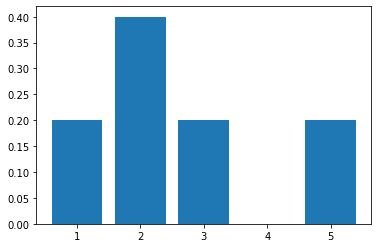

In [31]:
#Try plotting rv2
plt.bar(rv2.xk, rv2.pk)

<BarContainer object of 4 artists>

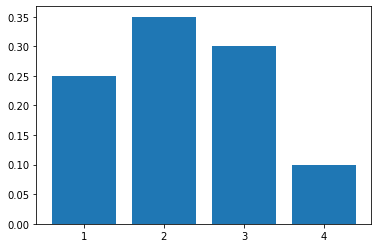

In [32]:
#Try plotting rv
plt.bar(rv.xk, rv.pk, tick_label=rv.xk)

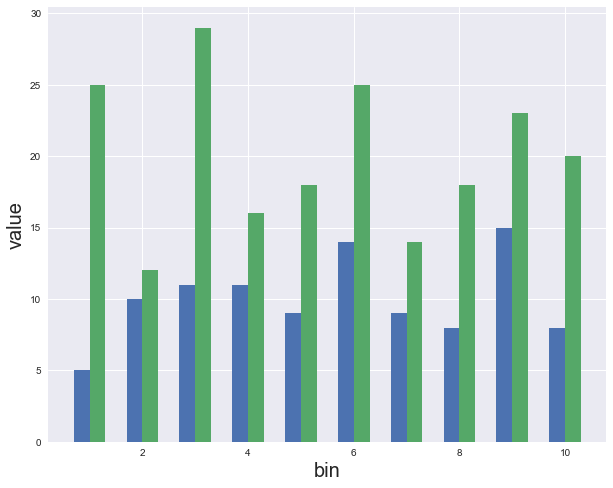

In [33]:
plt.style.use('seaborn')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

data = np.random.randint(1,11,100)
val, cnt = np.unique(data, return_counts=True)
ax.bar(val, cnt, width=-.3, align='edge')

data2 = np.random.randint(1,11,200)
val2, cnt2 = np.unique(data2, return_counts=True)
ax.bar(val2, cnt2, width=.3, align='edge')

ax.set_xlabel('bin', fontsize=20)
ax.set_ylabel('value', fontsize=20)

plt.show()

In [34]:
val,cnt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 5, 10, 11, 11,  9, 14,  9,  8, 15,  8], dtype=int64))

In [35]:
val2,cnt2

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([25, 12, 29, 16, 18, 25, 14, 18, 23, 20], dtype=int64))

In [36]:
# Messing around with methods of RVs
stats.norm.cdf(-1)

0.15865525393145707

In [37]:
stats.norm.pdf(3)

0.0044318484119380075

In [38]:
import math
1/math.sqrt(6.28)

0.3990434422338111

In [39]:
stats.norm.pdf(0)

0.3989422804014327

In [40]:
# So pdf returns the 'y-value' at a certain x, and cdf returns the area under the curve left of x

Extra testing of simulation methods

In [41]:
def SummarizeEstimates(estimates, alpha=0.90):
    """Computes the mean, standard deviation (std error), and a confidence interval for a sampling distribution (estimates).

    Args:
        estimates (array-like): A sequence of estimates for a statistic obtained from resampling (sampling distribution)
        alpha (float): Probability for the confidence interval. Must be between 0 and 1. Defaults to 0.90.

    Returns:
        mean: mean value of the estimates
        std: standard deviation of the estimates (std error)
        confidence interval: interval about the median of the distribution
    """
    rv = DiscreteRv(estimates)
    return np.mean(estimates), np.std(estimates), rv.interval(alpha)

In [42]:
def DiscreteRv(a):
    """Creates a scipy.stats discrete_rv.

    Arguments:
        a {array-like} -- a single data set, will be flattened if it is not already 1-D

    Returns:
        An instance of scipy.stats discrete_rv representing the input data
    """
    val,cnt = np.unique(a, return_counts=True)
    
    return stats.rv_discrete(values=(val,cnt/sum(cnt)))

In [43]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

In [44]:
means = SimulateSample()

In [45]:
results = SummarizeEstimates(means)

In [46]:
results

(90.11567319739781, 2.4572268319401007, (86.02457579205829, 94.24756628037088))

In [47]:
def GeneratePvalue(estimates, value):
    rv = DiscreteRv(estimates)
    return rv.cdf(value)

In [48]:
GeneratePvalue(means, 85)

0.022000000000000013

In [49]:
means

[89.96978613571368,
 93.22857438337202,
 90.67533450935406,
 90.5198267677072,
 89.26896976417032,
 94.24756628037088,
 91.56553251870486,
 93.0252719188074,
 88.6365446291067,
 89.50244313018248,
 92.40568379456515,
 86.60797860013061,
 86.09881795771358,
 88.4551060148532,
 88.19410455382551,
 88.05991015422117,
 93.55123686627621,
 84.93078693563533,
 92.12353887963734,
 90.63376870934887,
 86.74062016067846,
 87.77441134689278,
 88.2333545060699,
 90.61183002227273,
 89.66584006419318,
 92.06667722664078,
 88.39045571700046,
 93.50143758185607,
 92.61552181333838,
 90.37546517119046,
 94.9887488828279,
 94.93686406552244,
 87.48896149781497,
 87.00494334524575,
 90.62196033431862,
 92.46642515410078,
 89.68833375268879,
 91.05630928987898,
 88.70066248346447,
 87.97023472208608,
 96.16696379328197,
 88.35267044677617,
 88.07858977961811,
 92.75407986567762,
 90.59497603957578,
 91.4851728633361,
 92.36616018705847,
 94.48986883402895,
 96.09207333509097,
 90.80591278300192,
 90.005

In [56]:
np.random.seed(444)
data = {
        'industry': ['mining', 'transportation', 'hospitality', 'finance', 'entertainment'],
        'debt_ratio':np.random.randn(5),
        'cash_flow':np.random.randn(5) + 90
       }
data = pd.DataFrame.from_dict(data)
data = pd.concat((
                  data,
                  pd.get_dummies(data['industry'], drop_first=True)), axis=1)
data

,industry,debt_ratio,cash_flow,finance,hospitality,mining,transportation
0,mining,0.357440,88.856850,0,0,1,0
1,transportation,0.377538,89.457560,0,0,0,1
2,hospitality,1.382338,89.451292,0,1,0,0
3,finance,1.175549,90.208520,1,0,0,0
4,entertainment,-0.939276,90.212690,0,0,0,0
